## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the Dataset

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data1 = data.iloc[:,[3,6,-2]]
data1

,CreditScore,Age,EstimatedSalary
0,619,42,101348.88
1,608,41,112542.58
2,502,42,113931.57
3,699,39,93826.63
4,850,43,79084.10
...,...,...,...
9995,771,39,96270.64
9996,516,35,101699.77
9997,709,36,42085.58
9998,772,42,92888.52


## Preprocessing

In [5]:
data1.isnull().sum()

CreditScore        0
Age                0
EstimatedSalary    0
dtype: int64

In [6]:
data1.Age.min()

18

### ما از قصدددددددد داده های پرت را حذف نکردیم

### ولی باید حتما حتما حتما داده پرت حذف شود

# Kmeans Clustering

## Feature Scaling

In [7]:
X = data1.values

In [32]:
X

array([[6.1900000e+02, 4.2000000e+01, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 1.1393157e+05],
       ...,
       [7.0900000e+02, 3.6000000e+01, 4.2085580e+04],
       [7.7200000e+02, 4.2000000e+01, 9.2888520e+04],
       [7.9200000e+02, 2.8000000e+01, 3.8190780e+04]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)

In [33]:
X_mm

array([[0.538     , 0.32432432, 0.50673489],
       [0.516     , 0.31081081, 0.56270874],
       [0.304     , 0.32432432, 0.56965435],
       ...,
       [0.718     , 0.24324324, 0.21039009],
       [0.844     , 0.32432432, 0.46442905],
       [0.884     , 0.13513514, 0.19091423]])

## Feature Selection

In [9]:
from sklearn.decomposition import IncrementalPCA

In [10]:
pca = IncrementalPCA(n_components = 2)
X_pca = pca.fit_transform(X_mm)

In [35]:
pca1 = IncrementalPCA(n_components = 3)
X_pca1 = pca1.fit_transform(X_mm)

## Validating the best number of clusters with Elbow method

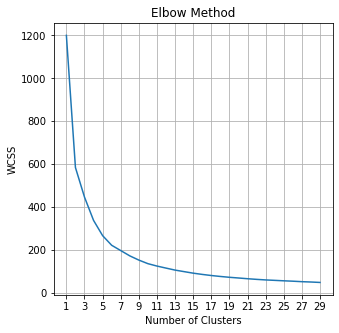

In [15]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    
    
fig = plt.figure(figsize = (5,5))
plt.plot(range(1,30), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks([j for j in range(1,30,2)])
plt.grid()
plt.show()

## Training the K-Means model on the Dataset

2D

In [17]:
kmeans = KMeans(n_clusters = 6, max_iter = 100).fit(X_pca)

In [18]:
y_kmeans_pca = kmeans.predict(X_pca)

3D

In [36]:
kmeans1 = KMeans(n_clusters = 6, max_iter = 100).fit(X_pca1)

In [37]:
y_kmeans_pca1 = kmeans1.predict(X_pca1)

## Visualising Results

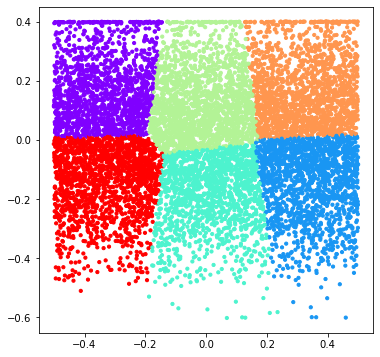

In [25]:
fig = plt.figure(figsize = (6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_kmeans_pca, s = 10, cmap = "rainbow")
plt.show()

In [31]:
X_pca1

array([[ 0.00620133, -0.06334894],
       [ 0.06227505, -0.08515874],
       [ 0.06950869, -0.29724007],
       ...,
       [-0.29005447,  0.11675529],
       [-0.03661228,  0.24257371],
       [-0.30929347,  0.28350733]])

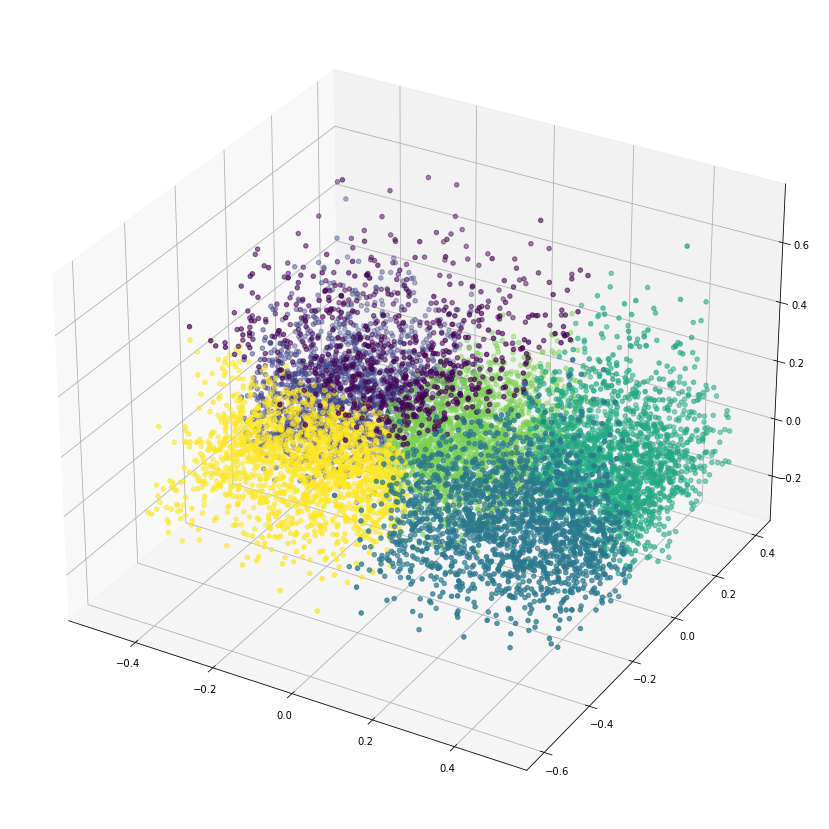

In [40]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection = "3d")
ax.scatter(X_pca1[:,0], X_pca1[:,1], X_pca1[:,2], c = y_kmeans_pca1)
plt.show()

# DBSCAN Clustering

### Validate MinPts

MinPts = 4 (2 * dimension = 2)

### Validate Epsilon

In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
neighbors = NearestNeighbors(n_neighbors = 4)
neighbors_fit = neighbors.fit(X_mm)
distances, indices = neighbors_fit.kneighbors(X_mm)

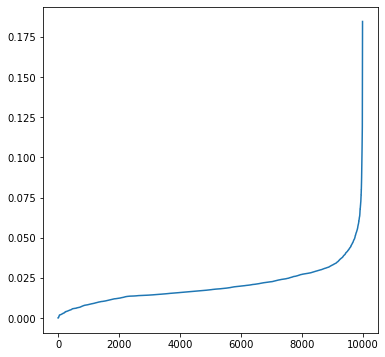

In [45]:
fig = plt.figure(figsize = (6,6))
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)

In [59]:
pca_dbs = IncrementalPCA(n_components = 3)
X_pca_dbs = pca_dbs.fit_transform(X)

In [46]:
from sklearn.cluster import DBSCAN

In [74]:
y_pred = DBSCAN(eps = 60, min_samples = 3).fit_predict(X_pca_dbs)
y_pred

array([  0,   1,  -1, ..., 793,  22, 960], dtype=int64)

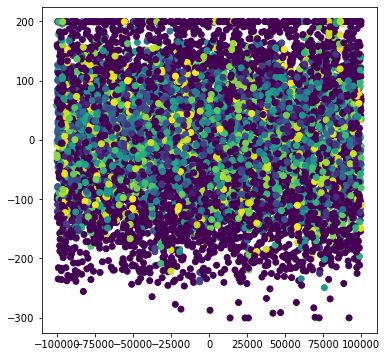

In [75]:
fig = plt.figure(figsize = (6,6))
plt.scatter(X_pca_dbs[:,0], X_pca_dbs[:,1], c = y_pred)

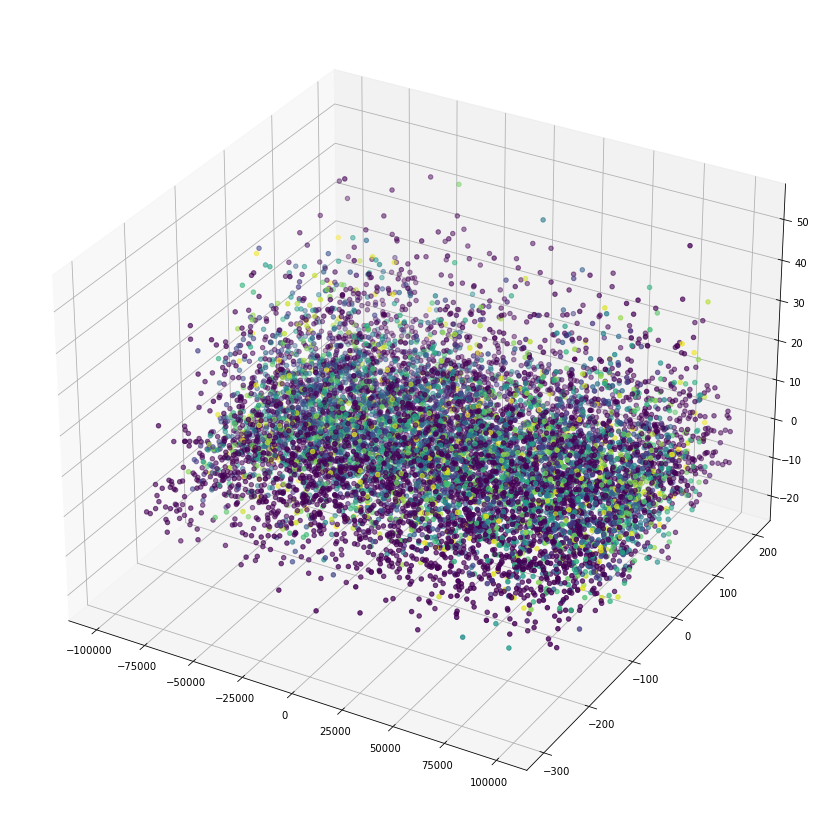

In [76]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection = "3d")
ax.scatter(X_pca_dbs[:,0], X_pca_dbs[:,1], X_pca_dbs[:,2], c = y_pred)
plt.show()